In [200]:
# Unit 4 HW - Portfolio Analysis Using Python

In [73]:
# Initial imports

In [74]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path
import hvplot.pandas
%matplotlib inline

In [75]:
# Data cleaning - will read and clean each .csv file

In [76]:
# Using the pathlib library to set Path to the whale_returns.csv file
whale_returns_data = Path("Resources/whale_returns.csv")

In [77]:
# Read the Whale Returns CSV, create a dataframe, and display results
whale_df = pd.read_csv(whale_returns_data)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [78]:
# Converting the Whale_df into a DateTimeIndex 
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [79]:
# Drop the extra date column
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [80]:
# Find null values
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [81]:
# Drop null values
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [82]:
# Change the appearance of the column names to reflect no spaces
columns = ["SOROS_FUND_MGMT_LLC", "PAULSON_&_CO_INC", "TIGER_GLOBAL_MGMT_LLC", "BERKSHIRE_HATHAWAY_INC"]
whale_df.columns = columns
whale_df.head()

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [83]:
# Using the pathlib library to set Path to the algo_returns.csv file
algo_returns_data = Path("Resources/algo_returns.csv")

In [84]:
# Read the Algo Returns CSV, create a dataframe, and display results
algo_df = pd.read_csv(algo_returns_data)
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [85]:
# Converting the algo_df into a DateTimeIndex 
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [86]:
# Drop the extra date column
algo_df.drop(columns=["Date"], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [87]:
# Find null values
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [88]:
# Drop null values
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [89]:
# Change the appearance of the column names to reflect no spaces
columns = ["Algo_1", "Algo_2"]
algo_df.columns = columns
algo_df.head()

,Algo_1,Algo_2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [90]:
# Using the pathlib library to set Path to the sp500_history.csv file
sp500_historical_data = Path("Resources/sp500_history.csv")


In [91]:
# Read the S&P 500 History CSV, create a dataframe, and display results
sp500_df = pd.read_csv(sp500_historical_data)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [92]:
# Converting the sp500_df into a DateTimeIndex 
sp500_df.set_index(pd.to_datetime(sp500_df["Date"], infer_datetime_format=True), inplace=True)
sp500_df

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06
...,...,...
2012-10-05,5-Oct-12,$1460.93
2012-10-04,4-Oct-12,$1461.40
2012-10-03,3-Oct-12,$1450.99


In [93]:
# Drop the extra date column
sp500_df.drop(columns=["Date"], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [94]:
# Find null values
sp500_df.isnull().sum()

Close    0
dtype: int64

In [95]:
# Drop null values
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [96]:
# Clear "Close" field with $ symbol
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]



Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [97]:
# Confirm datatype of S&P 500 df:
sp500_df.dtypes

Close    object
dtype: object

In [98]:
# Convert "Close" from dtype object to float
sp500_df["Close"] = sp500_df["Close"].astype("float")


In [99]:
# Confirm datatype
sp500_df.dtypes

Close    float64
dtype: object

In [100]:
# calculate daily returns
sp500_daily = sp500_df.pct_change()
sp500_daily.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [101]:
# Find null values of the daily returns 
sp500_daily.isnull().sum()

Close    1
dtype: int64

In [102]:
# Drop null values of the daily returns df
sp500_daily.dropna(inplace=True)
sp500_daily.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [103]:
columns = ["Returns"]
sp500_daily.columns = columns
sp500_daily.head()


,Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [104]:
# Combine the cleaned up dataframes by column, create an inner join
three_returns = pd.concat([whale_df, algo_df, sp500_daily], axis="columns", join="inner")


In [105]:
# Sort datetime index in ascending order 
three_returns.sort_index(inplace=True)

In [106]:
three_returns.head()

,SOROS_FUND_MGMT_LLC,PAULSON_&_CO_INC,TIGER_GLOBAL_MGMT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [162]:
# Plot daily returns of the whale_df portfolio 
whale_df.hvplot(figsize=(10,5), title="Daily Returns of the Whale Portfolio(Semi-Yearly)")
whale_df.hvplot.line(xlabel="Year", ylabel="Returns")



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [159]:
# Plot Paulson & Co. Inc. portion of portfolio:
whale_df["PAULSON_&_CO_INC"].hvplot(figsize=(10,5), title="Daily Returns, Paulson & Co, Inc.")
whale_df["PAULSON_&_CO_INC"].hvplot.line(xlabel="Year", ylabel="Returns")

:Curve   [Date]   (PAULSON_&_CO_INC)

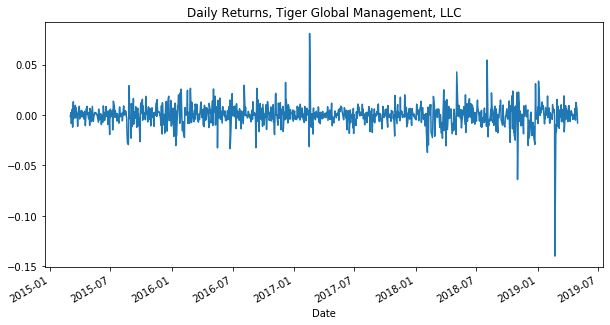

In [110]:
# Plot Tiger Global Mgmt portion of portfolio:
whale_df["TIGER_GLOBAL_MGMT_LLC"].plot(figsize=(10,5), title="Daily Returns, Tiger Global Management, LLC")    

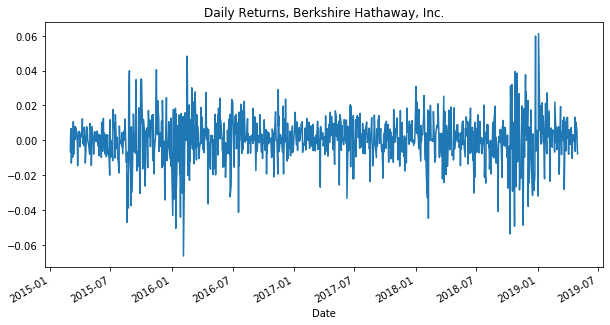

In [111]:
# Plot Berkshire Hathaway Inc. portion of portfolio:
whale_df["BERKSHIRE_HATHAWAY_INC"].plot(figsize=(10,5), title="Daily Returns, Berkshire Hathaway, Inc.")

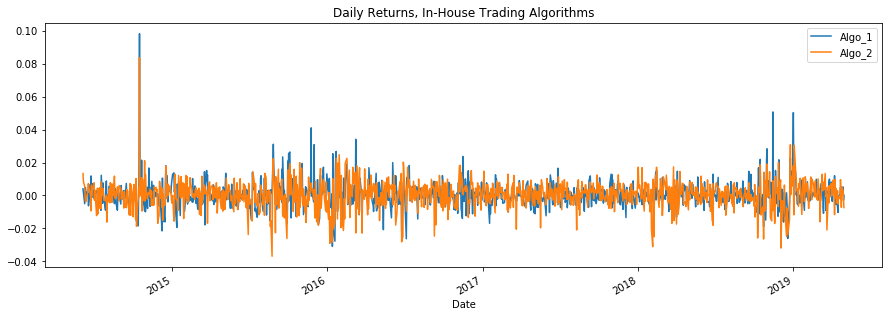

In [112]:
# Plot daily returns of algo_df portfolio:
algo_df.plot(figsize=(15,5), title="Daily Returns, In-House Trading Algorithms")

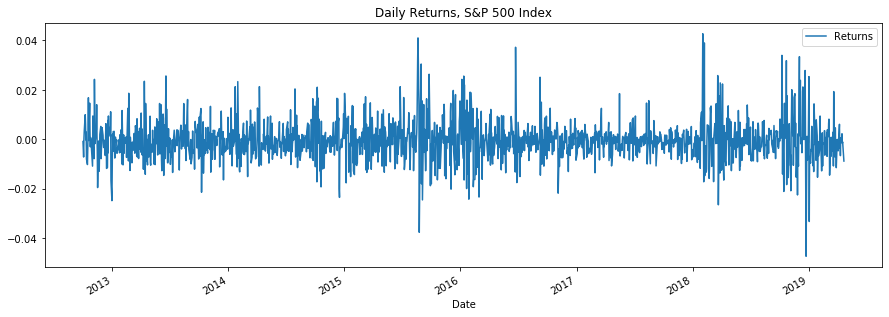

In [113]:
sp500_daily.plot(figsize=(15,5), title="Daily Returns, S&P 500 Index")

In [114]:
#Save Cleansed Data to New CSV:
# Save modified DataFrame to the Resources folder. 
# Use the `index` parameter set to `False` to exclude saving the index.
#people_df.to_csv("../Resources/people_cleansed.csv", index=False)